In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-7/insurance.csv


In [3]:
import numpy as np # linear algebra
import pandas as pd 

In [33]:
df=pd.read_csv("../input/assignment-7/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* check id there is any missing value in our data

In [6]:
df.isnull().any()


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

* So our data do not any missing(our data is clean) therefore our data is ready for use.

# data exploration analysis


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Our  data has 3 object types and and only one integer type.


NUMBER OF RAWS AND COLUMN IN OUR DATA

In [8]:
print(df.shape)

(1338, 7)


Our data has total number of 1338 raws and 7 columns.

checking unique values

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

from the unque value table it shows that age has 47 unque values, sex has 2 that male and female and so forth

<AxesSubplot:xlabel='bmi'>

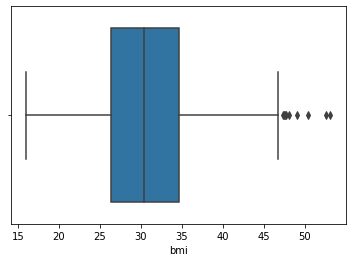

In [10]:
import seaborn as sns
sns.boxplot(x=df['bmi'])

There are 7 outliers in column bmi.

In [40]:
# IQR
Q1 = np.percentile(df['bmi'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['bmi'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
upper = Q3 -1.5*IQR
lower = Q1 -1.5*IQR
print(IQR)
print(upper)
print(lower)

8.384999999999998
22.110000000000003
13.725000000000005


In [41]:
# Above Upper bound
upper = df['bmi'] >= (Q3+1.5*IQR)
  
print("Upper bound:",upper)
print(np.where(upper))
  
# Below Lower bound
lower = df['bmi'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool
(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool
(array([], dtype=int64),)


Our outlier are 116, 238, 401, 543, 847, 860, 1047, 1088 and 1317. so we need to remove these outliers

In [42]:
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
#df['bmi'].drop(lower[0], inplace = True)

KeyError: '[False] not found in axis'

Also we need to drop region in our data

In [34]:
df1=df.drop(['region'],axis=1)
df1.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


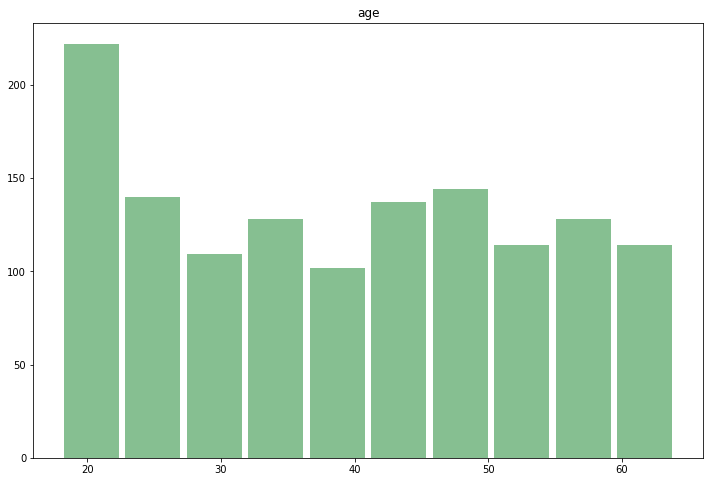

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#a = ["male","female", "female", "empty","male","female"]
#df = pd.DataFrame(a, columns= ["gender"])

df.hist(column='age', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

#df["age"].value_counts().plot.bar()

plt.show()

from the histogram above we can see that there are more people with age from 20 and below. Which make more sence because its seems like many parents have included their children in insurance. 

In [ ]:
#checking the column of age
df["age"]

Text(0, 0.5, 'mean charges of insurance')

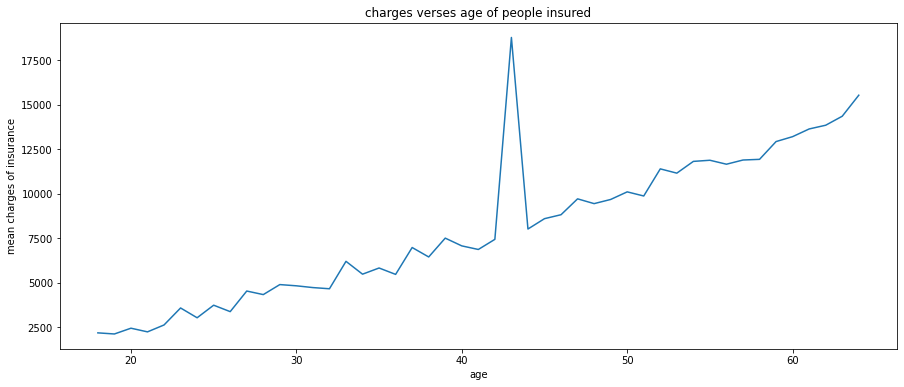

In [9]:
#group by age to see the age that correspond to high charges in insurance
from matplotlib import pyplot as plt
df.groupby('age')['charges'].median().plot(figsize=(15,6))
plt.title('charges verses age of people insured')
plt.ylabel('mean charges of insurance')

Age is directly proportional to charges paid except those people at the age of 43 who pay lot of money.

# NUMERICAL VARIABLE

In [10]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
print(numerical)

['age', 'bmi', 'children', 'charges']


# 
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values.

In [11]:
# let's visualise the values of the discrete variables
numerical_discrete = []

for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


# Continuous variables

In [12]:
# find continuous variables
# let's remember to skip the target label variable charges, which is numerical

numerical_continous = [var for var in numerical if var not in numerical_discrete and var not in ['charges']]
print('There are {} numerical_continuous variables'.format(len(numerical_continous)))

There are 2 numerical_continuous variables


In [13]:
numerical_continous=df[["age", "bmi"]]
numerical_continous.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


<AxesSubplot:>

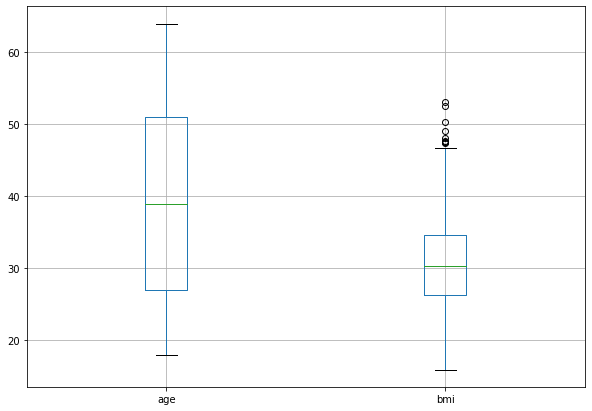

In [14]:
# Plot data before dropping those greater than z-score 3. 
import seaborn as sns

plt.figure(figsize = (10,7))
numerical_continous.boxplot()

# Outlier Detection through Mathematical Method (Z-Score)

In [19]:
from scipy import stats
import numpy as np
bmi_c = numerical_continous
#scipy > numpy > pandas/Sklearn
zscore = np.abs(stats.zscore(bmi_c))
zscore

array([[1.43876426, 0.45332   ],
       [1.50996545, 0.5096211 ],
       [0.79795355, 0.38330685],
       ...,
       [1.50996545, 1.0148781 ],
       [1.29636188, 0.79781341],
       [1.55168573, 0.26138796]])

In [20]:
threshold = 2
np.where(zscore > 2)

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
         383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
         547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
         821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
        1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
        1317, 1332]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [21]:
threshold = 2
bmi_clean = numerical_continous
bmi_clean = bmi_clean[(zscore < threshold).all(axis=1)]

bmi_c.shape

(1338, 2)

In [23]:
bmi_clean.shape

(1281, 2)

<AxesSubplot:>

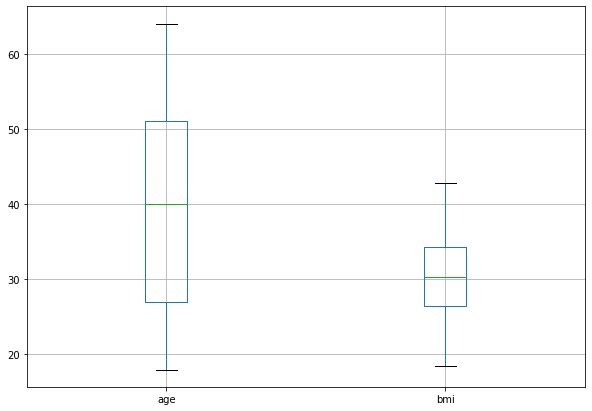

In [24]:
# Plot data before dropping those greater than z-score 2. 
import seaborn as sns

plt.figure(figsize = (10,7))
bmi_clean.boxplot()

THE PLOT ABOVE SHOWS NO MORE OUTLIERS, IT SHOWS THAT WITH THRESHOLD OF 2, MEANING IF WE MAKE OUR OUTPUT TO BE BETWEEN -2 AND 2, WE ELIMANATE OUTLIERS.

In [25]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))



There are 2 categorical variables


In [26]:
  for var in df.columns :
      if df[var].dtype=='O':
             print(var)
             #print('There are {} categorical variables'.format(len(categorical)))

sex
smoker


THERE ARE TWO CATEGORICAL VARIABLES WHICH ARE SEX AND SMOKER.

# Outliers in discrete variables

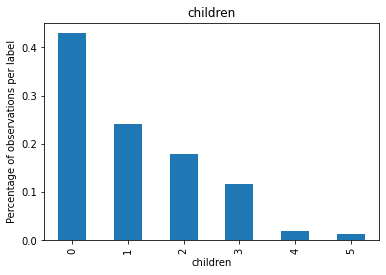

In [27]:
# outlies in discrete variables
for var in numerical_discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

# Outliers in categorical variables

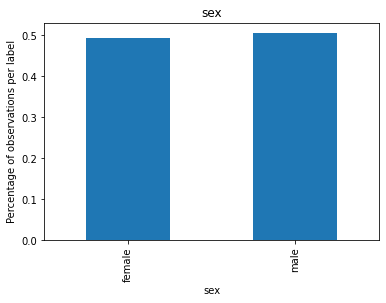

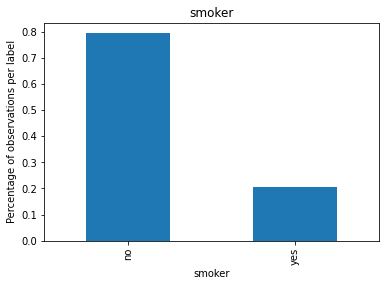

In [28]:
# outlies in categoricalvariables
for var in categorical:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

Outliers are extreme values that we come across, where they may be influential to the model or not. When it comes to **categorical data** (say Gender: as in male and female). There's no way of any outlier detection in that. If you mean something like this: You take a sample of 10 with 9 males and 1 female. So you mean that "1 female" is an outlier? NO! It's just the composition of the sample which you have selected.

# Encode categorical and discrete variables

Encoding is converting categorical variables into numerical. Categorical caanot be neither discrete nor continous.

# ENCODING SEX

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["categorical_encode"] = ord_enc.fit_transform(df[["sex"]])
df[["sex", "categorical_encode"]]

,sex,categorical_encode
0,female,0.0
1,male,1.0
2,male,1.0
3,male,1.0
4,male,1.0
...,...,...
1333,male,1.0
1334,female,0.0
1335,female,0.0
1336,female,0.0


# ENCODING SMOKERS

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["categorical_encode"] = ord_enc.fit_transform(df[["smoker"]])
df[["smoker", "categorical_encode"]]

,smoker,numeri_encode
0,yes,1.0
1,no,0.0
2,no,0.0
3,no,0.0
4,no,0.0
...,...,...
1333,no,0.0
1334,no,0.0
1335,no,0.0
1336,no,0.0


In [2]:
from sklearn.model_selection import train_test_split
X_tain, x_test,y_train,y_test = train_test_split(df[""])

In [36]:
#separating target variable from feature
#creating x=all feature columns except target
x=df.drop("charges",axis=1)

#creating y=label
y=df["charges"]

In [37]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In an insurance the venue you live in do not affect the premium and/ or claim. Therefore we are going to drop region in our data.

In [40]:
#droping region in our data
df2=x.drop(['region'],axis=1)
df2.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no
